In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dchelsea03/Applied-Machine-Learning-Projects/main/AmesHousing.csv')
data.shape

(2930, 82)

In [4]:
data.corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


According to the special note, we have to remove any houses with more than 4000 square feet since three of them are true outliers and 2 are unusual sales.

In [5]:
data.drop(data[data['Gr Liv Area']>4000].index,inplace=True)
data.shape

(2925, 82)

---
# 1. Visualize the univariate distribution of each continuous variable, and the distribution of the target. 

In [6]:
cont = data.select_dtypes("number")
cont=cont.drop(columns=['PID','Order','Fireplaces','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','MS SubClass', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'Yr Sold'])
nominal=data[['PID','MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type','Sale Condition']]
ordinal=data[['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']]
discrete=data[['Order','Year Built','Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars','Mo Sold','Yr Sold']]

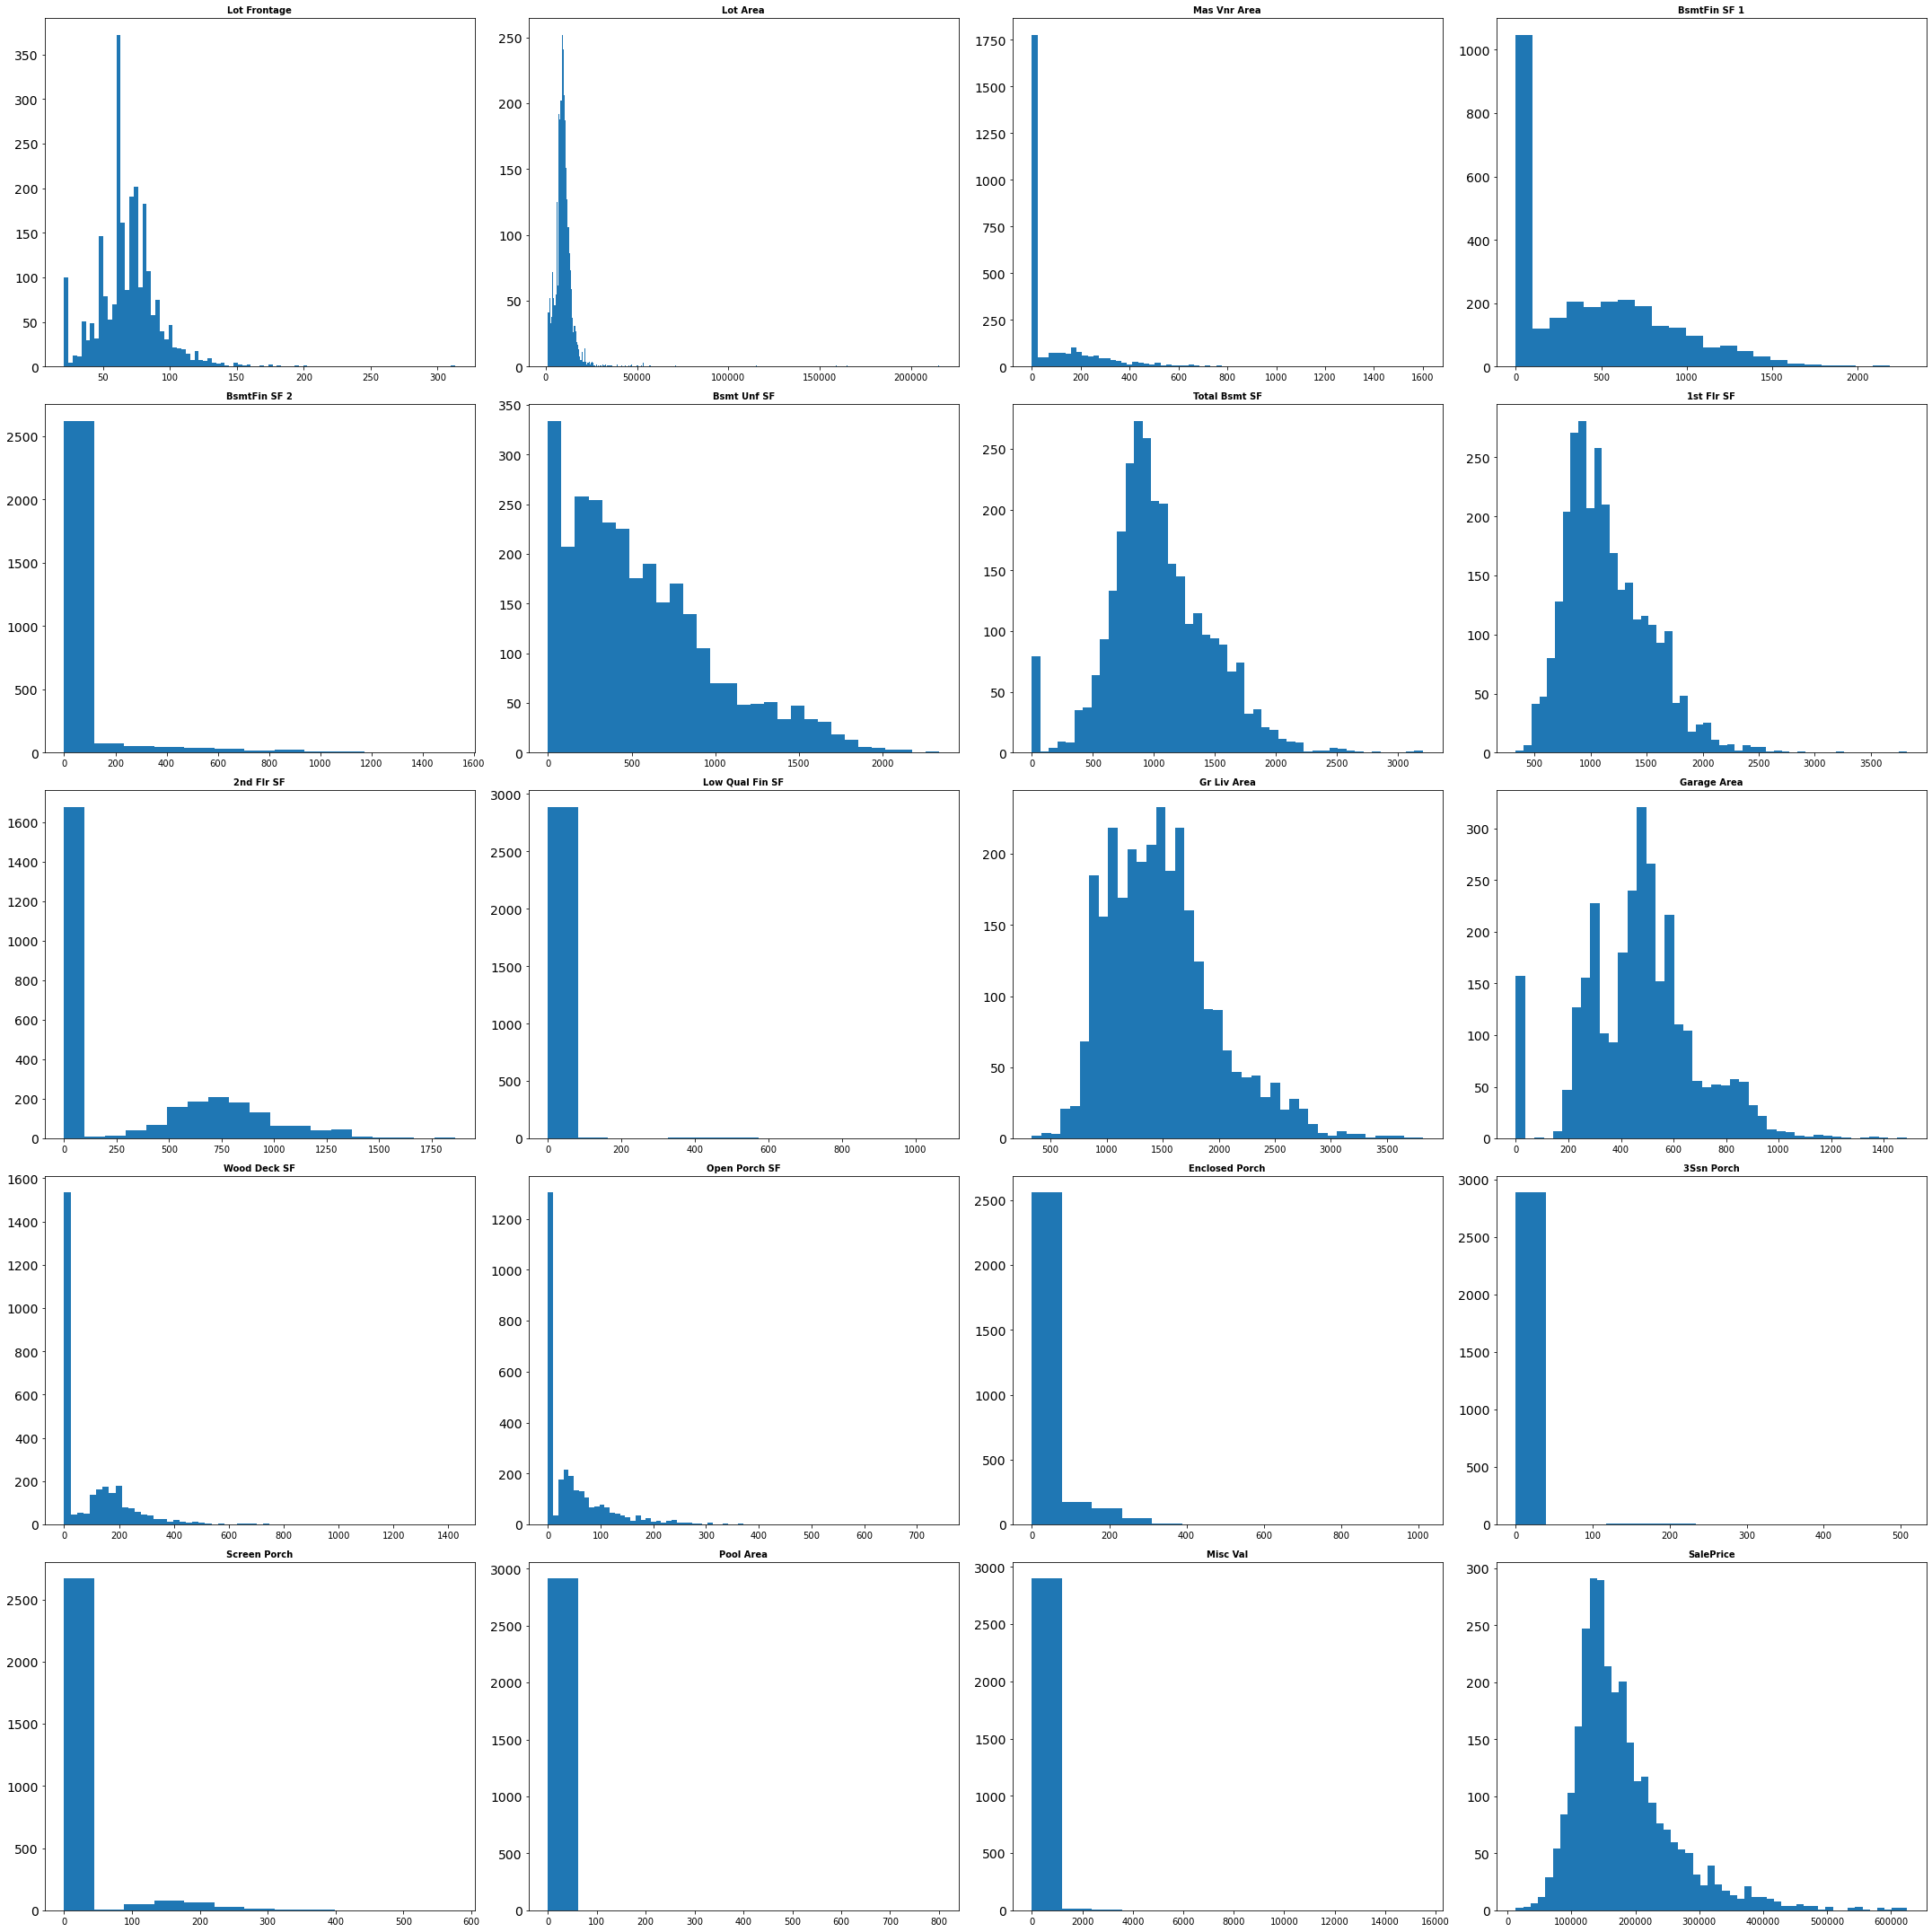

In [7]:
fig, axs = plt.subplots(5, 4, figsize=(30,30))

for i, ax in enumerate(axs.flat):
    ax.hist(cont.iloc[:,i],bins="auto")
    ax.set_title(cont.columns[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

We notice that there are missing values and a lot of the values in some features are 0. We see that features like Sales Price, Total Bsmt SF, 1st Floor SF are almost normally distributed. Some distributions are skewed to the right.

---
# Cleaning the data

Check the missing values in each variable type (nominal, continuous, discrete, ordinal).

**Continuous**

<AxesSubplot:>

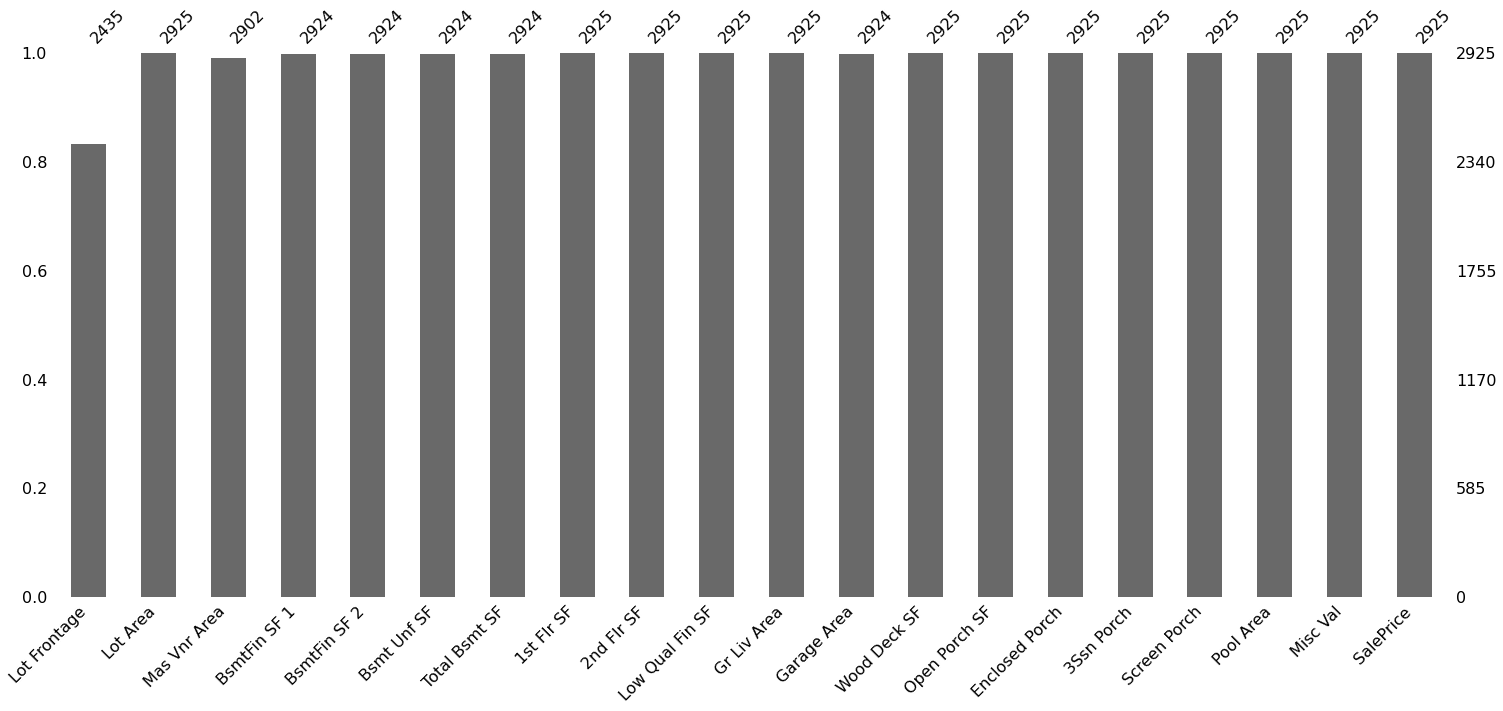

In [8]:
msno.bar(cont)

In [9]:
cont.isnull().sum()

Lot Frontage       490
Lot Area             0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64

In [10]:
cont.drop(columns=['Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val'])

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,141.0,31770,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,528.0,210,62,215000
1,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,730.0,140,0,105000
2,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,312.0,393,36,172000
3,93.0,11160,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,522.0,0,0,244000
4,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,482.0,212,34,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,588.0,120,0,142500
2926,NaN,8885,0.0,301.0,324.0,239.0,864.0,902,0,0,902,484.0,164,0,131000
2927,62.0,10441,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,80,32,132000
2928,77.0,10010,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,418.0,240,38,170000


In [11]:
#Fill missing values with mean or median depending on the data distrbution
cont['Lot Frontage']=cont['Lot Frontage'].fillna(cont['Lot Frontage'].mean())
cont['Mas Vnr Area']=cont['Mas Vnr Area'].fillna(cont['Mas Vnr Area'].mean())
cont['BsmtFin SF 1']=cont['BsmtFin SF 1'].fillna(cont['BsmtFin SF 1'].median())
cont['BsmtFin SF 2']=cont['BsmtFin SF 2'].fillna(cont['BsmtFin SF 2'].median())
cont['Bsmt Unf SF']=cont['Bsmt Unf SF'].fillna(cont['Bsmt Unf SF'].median())
cont['Total Bsmt SF']=cont['Total Bsmt SF'].fillna(cont['Total Bsmt SF'].mean())
cont['Garage Area']=cont['Garage Area'].fillna(cont['Garage Area'].median())

**Nominal**

<AxesSubplot:>

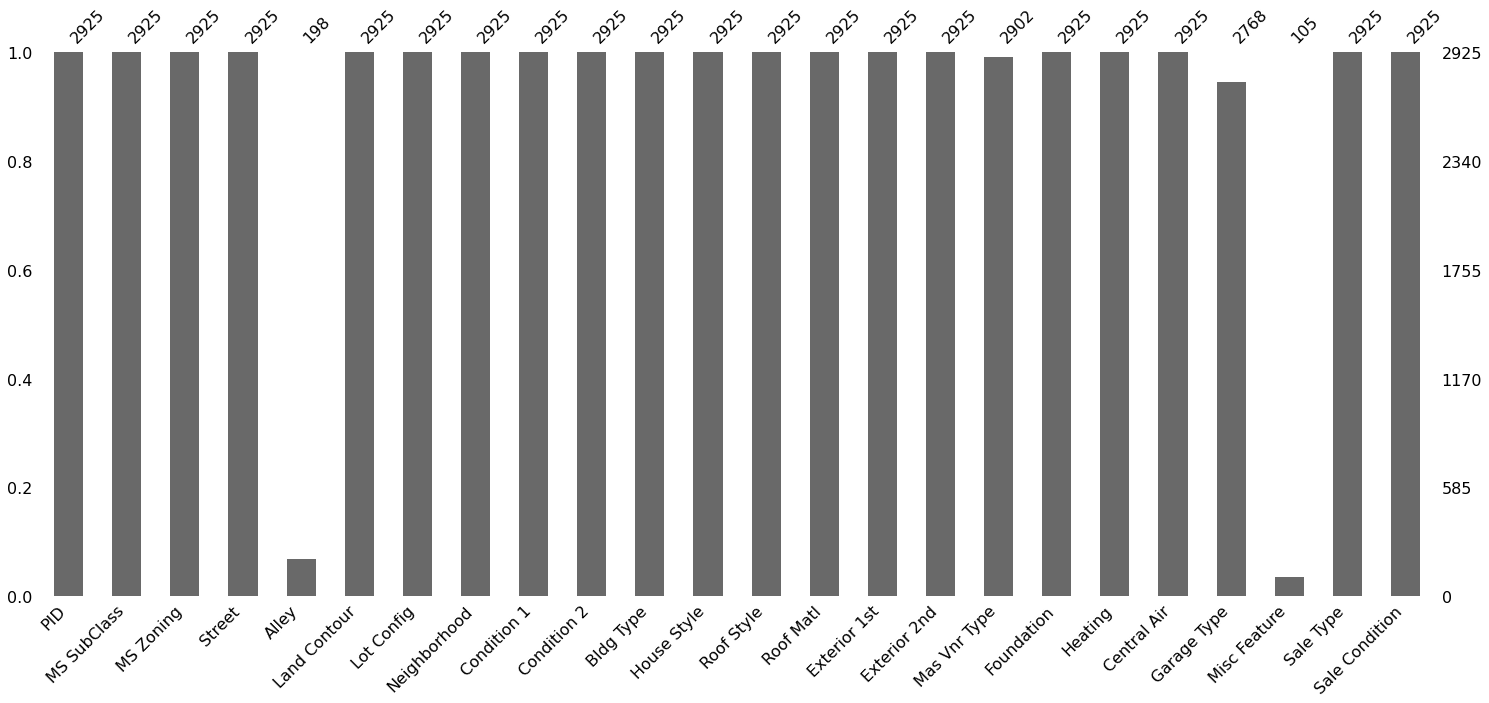

In [12]:
msno.bar(nominal)

In [13]:
nominal.isnull().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Street               0
Alley             2727
Land Contour         0
Lot Config           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Foundation           0
Heating              0
Central Air          0
Garage Type        157
Misc Feature      2820
Sale Type            0
Sale Condition       0
dtype: int64

In [14]:
#Since we dropped Misc Value, we'll drop misc feature as well
nominal.drop(columns=['Misc Feature'])

,PID,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,...,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Sale Type,Sale Condition
0,526301100,20,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,...,CompShg,BrkFace,Plywood,Stone,CBlock,GasA,Y,Attchd,WD,Normal
1,526350040,20,RH,Pave,NaN,Lvl,Inside,NAmes,Feedr,Norm,...,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Attchd,WD,Normal
2,526351010,20,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,...,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,Y,Attchd,WD,Normal
3,526353030,20,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,...,CompShg,BrkFace,BrkFace,None,CBlock,GasA,Y,Attchd,WD,Normal
4,527105010,60,RL,Pave,NaN,Lvl,Inside,Gilbert,Norm,Norm,...,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,Pave,NaN,Lvl,CulDSac,Mitchel,Norm,Norm,...,CompShg,HdBoard,HdBoard,None,CBlock,GasA,Y,Detchd,WD,Normal
2926,923276100,20,RL,Pave,NaN,Low,Inside,Mitchel,Norm,Norm,...,CompShg,HdBoard,HdBoard,None,CBlock,GasA,Y,Attchd,WD,Normal
2927,923400125,85,RL,Pave,NaN,Lvl,Inside,Mitchel,Norm,Norm,...,CompShg,HdBoard,Wd Shng,None,PConc,GasA,Y,NaN,WD,Normal
2928,924100070,20,RL,Pave,NaN,Lvl,Inside,Mitchel,Norm,Norm,...,CompShg,HdBoard,HdBoard,None,CBlock,GasA,Y,Attchd,WD,Normal


In [15]:
nominal['Alley']=nominal['Alley'].replace(np.nan,'NA')
nominal['Alley'].value_counts()

NA      2727
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [16]:
nominal['Mas Vnr Type']=nominal['Mas Vnr Type'].fillna(nominal['Mas Vnr Type'].mode())
nominal['Garage Type']=nominal['Garage Type'].fillna(nominal['Garage Type'].mode())

**Discrete**

<AxesSubplot:>

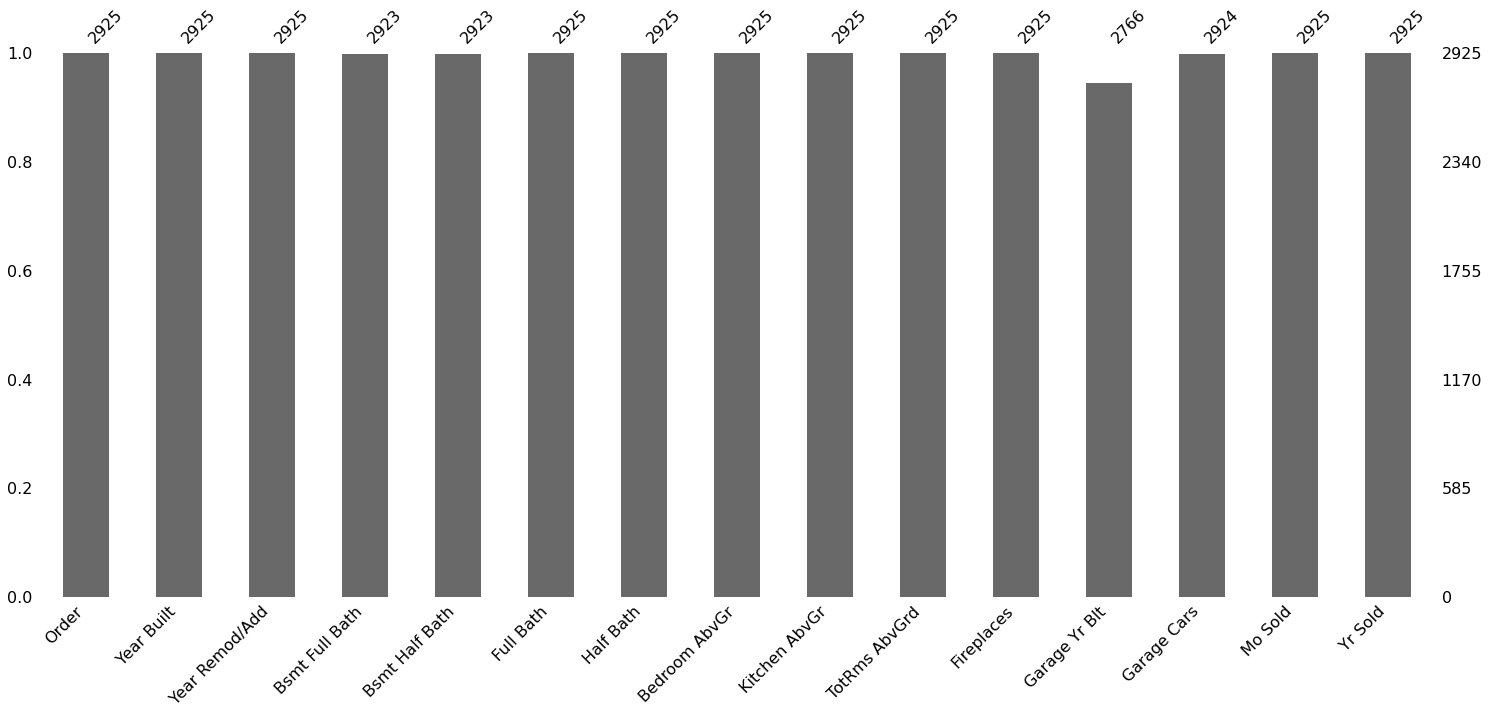

In [17]:
msno.bar(discrete)

In [18]:
discrete.isnull().sum()

Order               0
Year Built          0
Year Remod/Add      0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     159
Garage Cars         1
Mo Sold             0
Yr Sold             0
dtype: int64

In [19]:
discrete['Bsmt Full Bath']=discrete['Bsmt Full Bath'].fillna(discrete['Bsmt Full Bath'].mode())
discrete['Bsmt Half Bath']=discrete['Bsmt Half Bath'].fillna(discrete['Bsmt Half Bath'].mode())
discrete['Garage Yr Blt']=discrete['Garage Yr Blt'].fillna(discrete['Garage Yr Blt'].mode())
discrete['Garage Cars']=discrete['Garage Cars'].fillna(discrete['Garage Cars'].mode())

**Ordinal**

<AxesSubplot:>

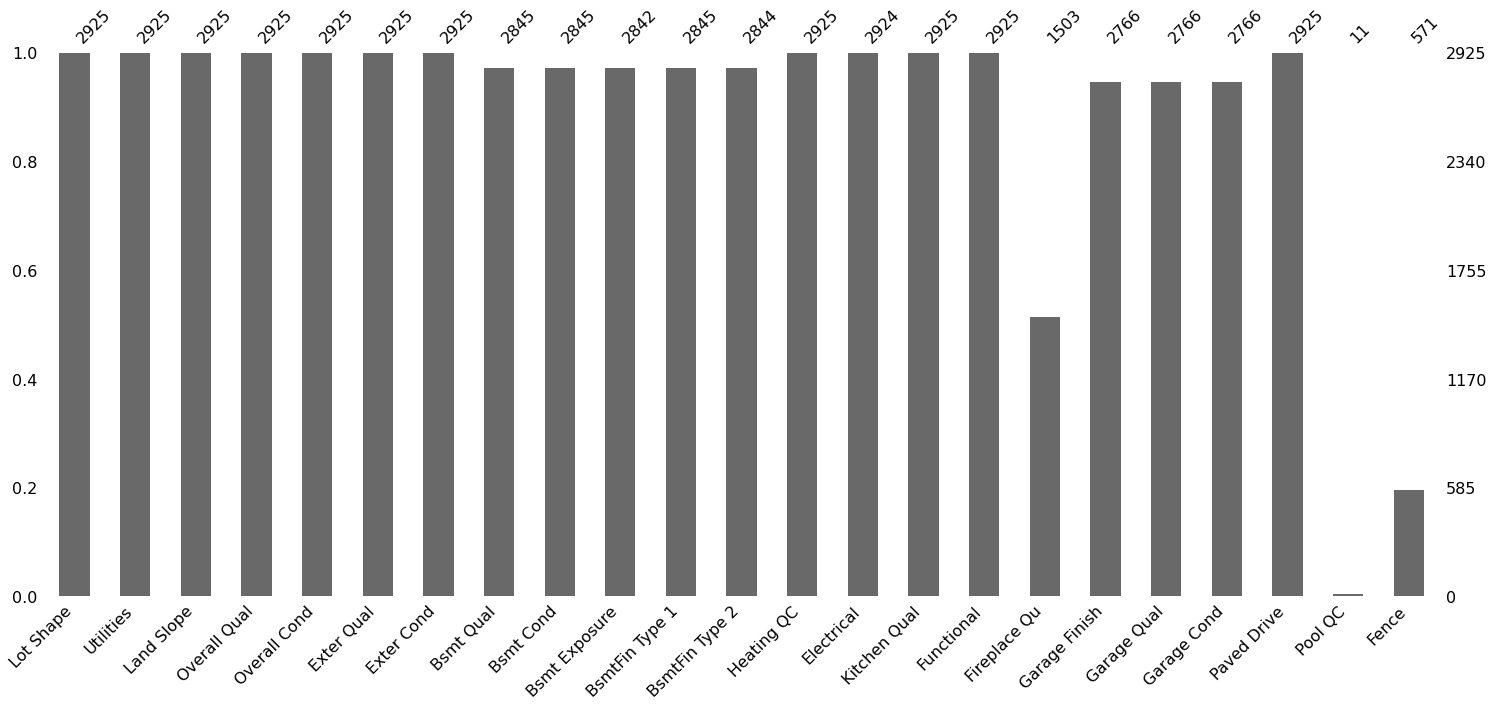

In [20]:
msno.bar(ordinal)

In [21]:
ordinal.isnull().sum()

Lot Shape            0
Utilities            0
Land Slope           0
Overall Qual         0
Overall Cond         0
Exter Qual           0
Exter Cond           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Heating QC           0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1422
Garage Finish      159
Garage Qual        159
Garage Cond        159
Paved Drive          0
Pool QC           2914
Fence             2354
dtype: int64

In [22]:
ordinal['Fireplace Qu']=ordinal['Fireplace Qu'].fillna(ordinal['Fireplace Qu'].mode())
ordinal['Bsmt Qual']=ordinal['Bsmt Qual'].replace(np.nan,'NA')
ordinal['Bsmt Cond']=ordinal['Bsmt Cond'].replace(np.nan,'NA')
ordinal['Bsmt Exposure']=ordinal['Bsmt Exposure'].replace(np.nan,'NA')
ordinal['BsmtFin Type 1']=ordinal['BsmtFin Type 1'].replace(np.nan,'NA')
ordinal['BsmtFin Type 2']=ordinal['BsmtFin Type 2'].replace(np.nan,'NA')
ordinal['Fireplace Qu']=ordinal['Fireplace Qu'].replace(np.nan,'NA')
ordinal['Garage Finish']=ordinal['Garage Finish'].replace(np.nan,'NA')
ordinal['Garage Qual']=ordinal['Garage Qual'].replace(np.nan,'NA')
ordinal['Garage Cond']=ordinal['Garage Cond'].replace(np.nan,'NA')
ordinal['Fireplace Qu']=ordinal['Fireplace Qu'].replace(np.nan,'NA')
ordinal['Fence']=ordinal['Fence'].replace(np.nan,'NA')

---
# 2. Visualize the dependency of the target on each continuous feature.

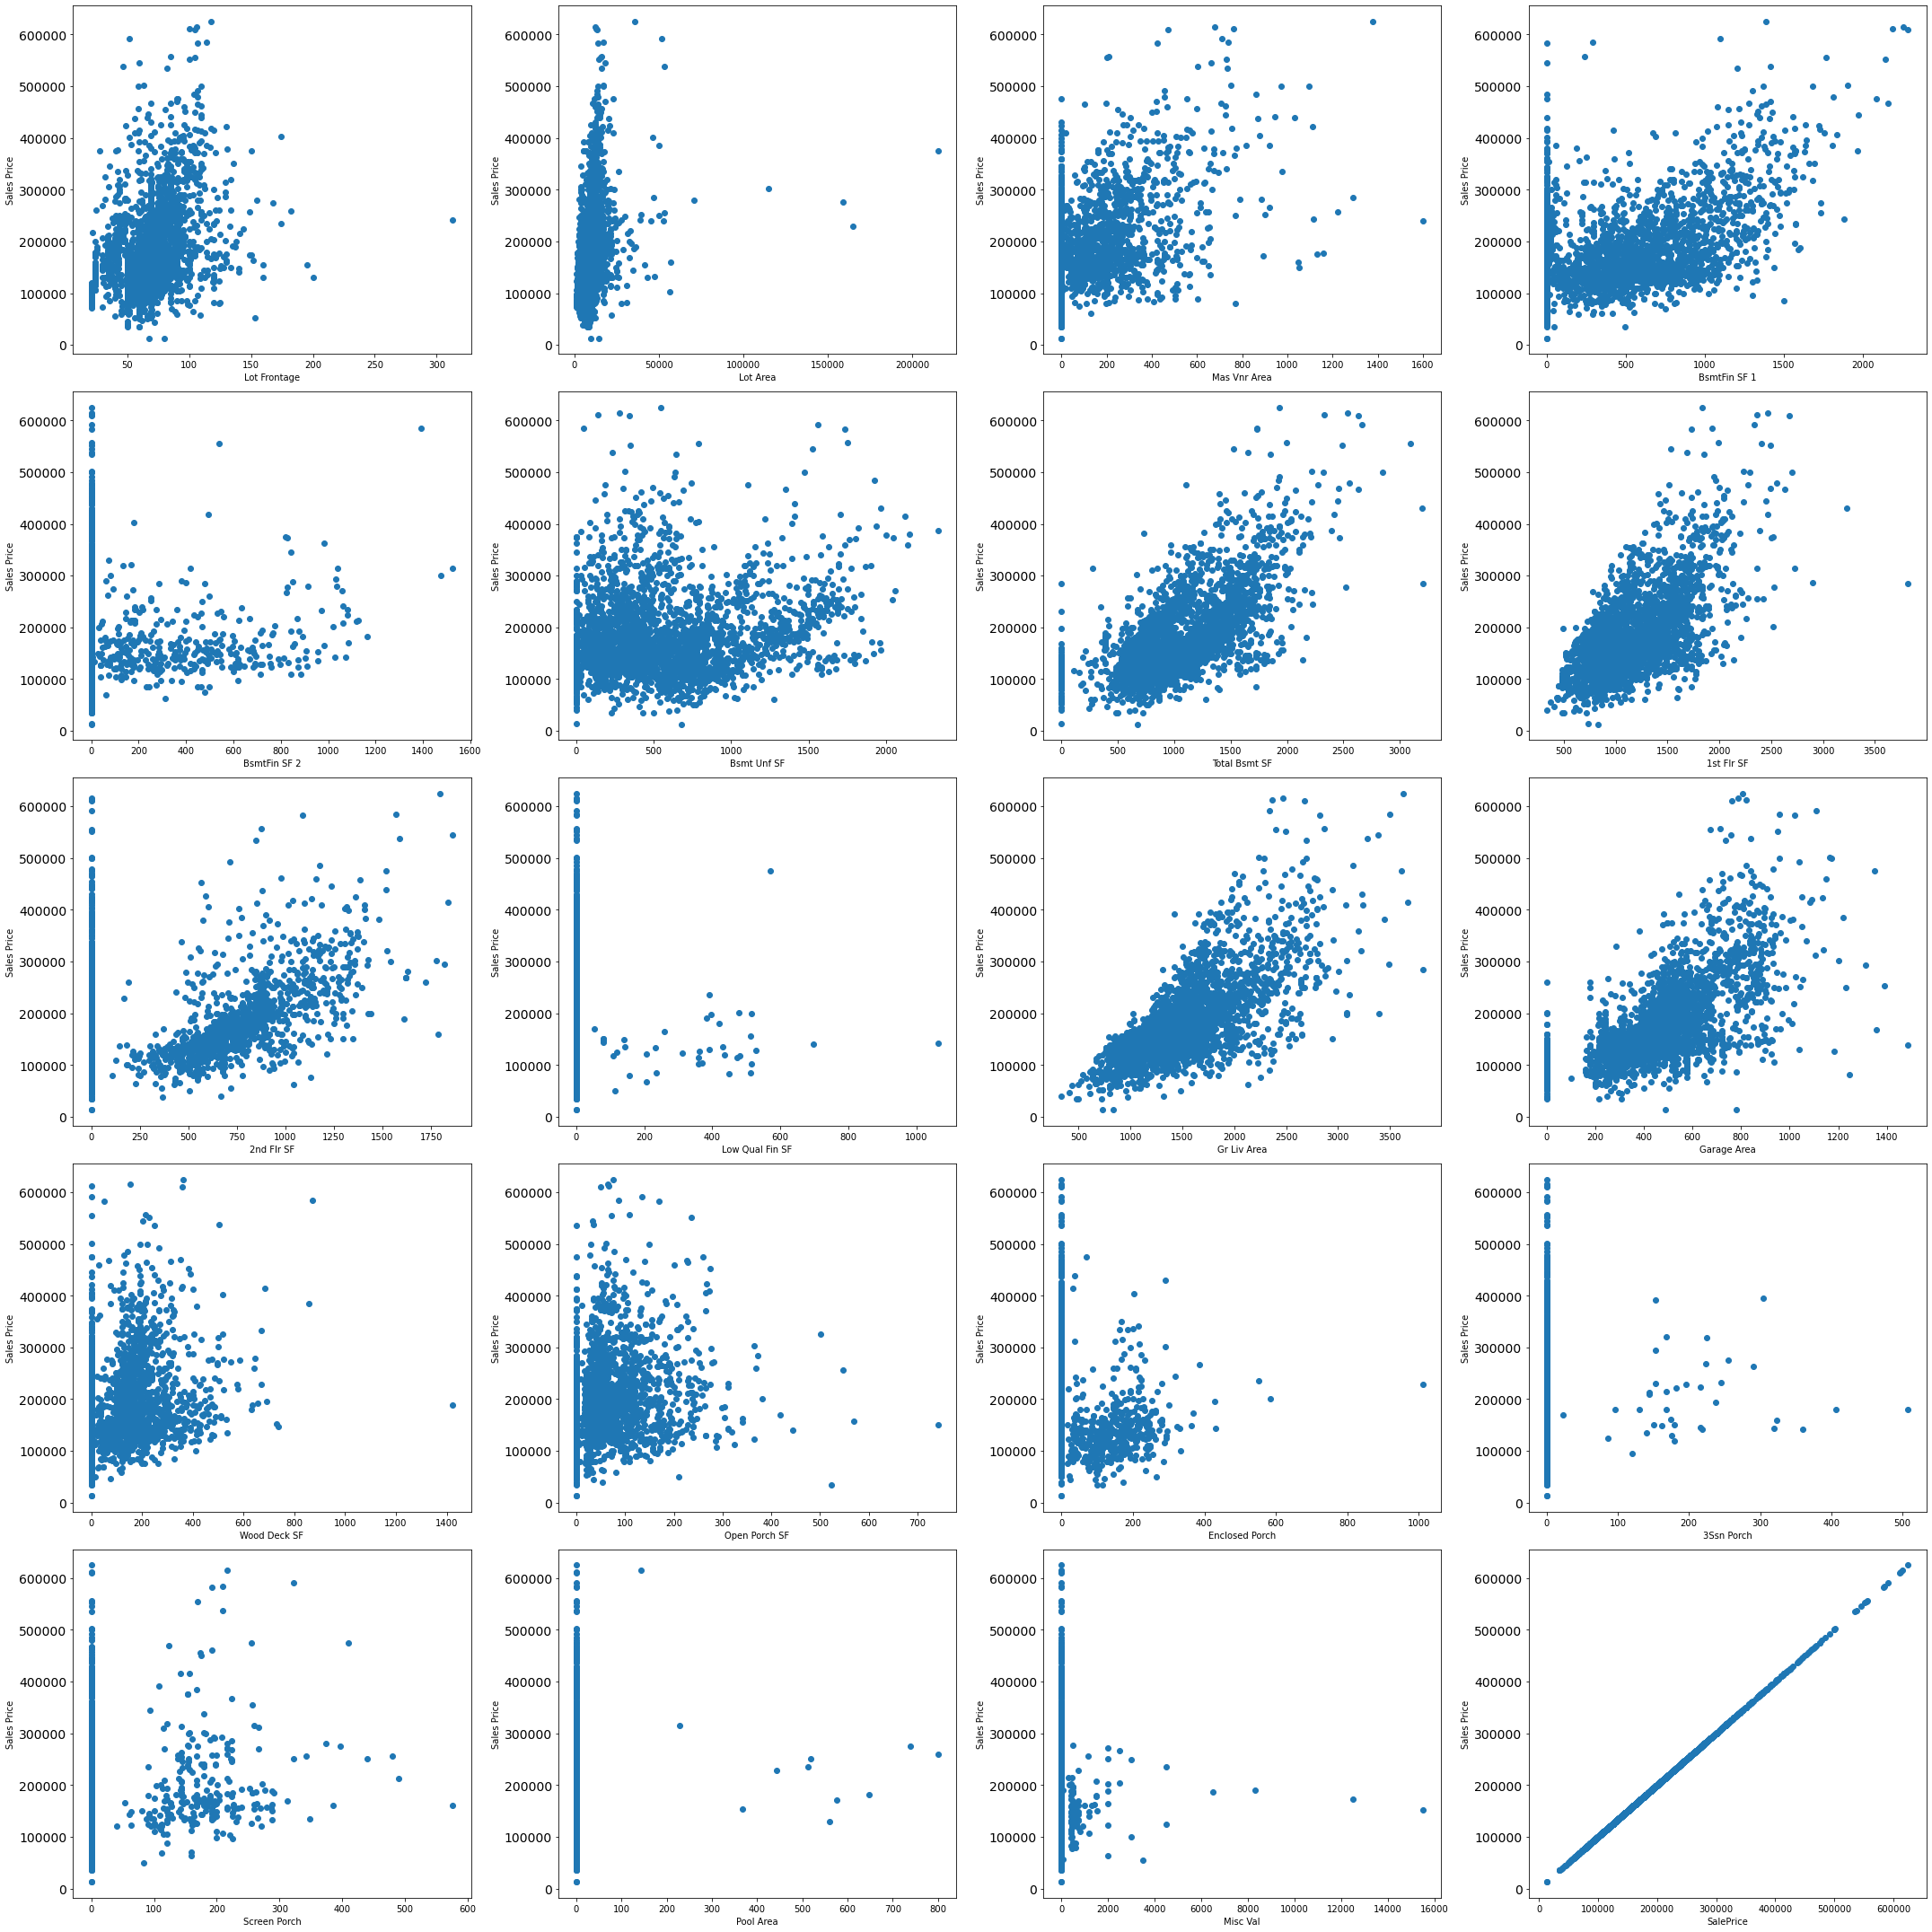

In [23]:
fig, axs = plt.subplots(5, 4, figsize=(30,30))

for i, ax in enumerate(axs.flat):
    ax.scatter(cont.iloc[:,i],y=data['SalePrice'])
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylabel('Sales Price')
    ax.set_xlabel(cont.columns[i])
    
plt.tight_layout()

---
# 3. For each categorical (nominal) variable, cross-validate a Linear Regression model using just this variable (onehot-encoded).

In [24]:
#Separate features and target
features=pd.concat([cont,nominal,ordinal,discrete], axis=1)
features.drop(columns='SalePrice')
target=data[['SalePrice']]

In [25]:
#Split train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [26]:
#Split train and test for continuous, ordinal, nominal and discrete columns
ordinal_train=X_train[list(ordinal.columns)]
ordinal_test=X_test[list(ordinal.columns)]
nominal_train=X_train[list(nominal.columns)]
nominal_test=X_test[list(nominal.columns)]
discrete_train=X_train[list(discrete.columns)]
discrete_test=X_test[list(discrete.columns)]
cont_train=X_train[list(cont.columns)]
cont_test=X_test[list(cont.columns)]

In [27]:
for col in nominal_train.columns:
  oht=OneHotEncoder()
  nom_oht=(oht.fit_transform(nominal_train[col].values.reshape(-1,1))).toarray()
  r= np.mean(cross_val_score(LinearRegression(), nom_oht, y_train, scoring='r2',cv=20))
  print(col, r)

PID -0.015926083281363114
MS SubClass -9.455473055467573e+22
MS Zoning 0.11123033570557424
Street -0.010335026627598904
Alley 0.01100134208248213
Land Contour 0.03510125456378359
Lot Config 0.002217923864491661
Neighborhood -5.845409932774216e+23
Condition 1 0.027293174252573354
Condition 2 -2.903832407975231e+23
Bldg Type 0.01994043800538507
House Style 0.04671726289352911
Roof Style 0.058499185077747276
Roof Matl -1.0142256308567245e+25
Exterior 1st -4.398218678051563e+21
Exterior 2nd -1.4200594752063888e+24
Mas Vnr Type -4.159051495162945e+23
Foundation 0.26471948781476623
Heating -7.688164739904747e+23
Central Air 0.05735339032449728
Garage Type 0.2330562537890884
Misc Feature -1.7929171999875424e+24
Sale Type -1.1919442975103643e+21
Sale Condition 0.13334102236425965


In [28]:
for col in nominal_test.columns:
  oht=OneHotEncoder()
  nom_oht=(oht.fit_transform(nominal_test[col].values.reshape(-1,1))).toarray()
  r= np.mean(cross_val_score(LinearRegression(), nom_oht, y_test, scoring='r2',cv=20))
  print(col,r)

PID -0.09305288751713614
MS SubClass -1.2633446046993349e+24
MS Zoning 0.07502274948537006
Street -0.04047369643630068
Alley -0.03512200220339358
Land Contour -0.036191083712401886
Lot Config -1.0510294683929362e+25
Neighborhood -6.667633334945944e+23
Condition 1 -0.010881907895389887
Condition 2 -9.303939112926231e+25
Bldg Type -0.016659191441959494
House Style 0.03655652706643793
Roof Style -0.035512198591566804
Roof Matl -0.04145748336554086
Exterior 1st -8.424815286800454e+24
Exterior 2nd -1.0491225253621468e+26
Mas Vnr Type 0.11619852746263806
Foundation 0.28281658958171974
Heating -4.531613953420531e+25
Central Air 0.05452264618237712
Garage Type 0.23720690189193436
Misc Feature -0.044476956343152116
Sale Type 0.06890896802084787
Sale Condition 0.08204901515706718


## Visualize the relationship of the categorical variables that provide the best $R^2$ value with the target.

The top three features that give that best r squared values are: Foundation, Garage Type and Sale Type.

<AxesSubplot:xlabel='Sale Type', ylabel='SalePrice'>

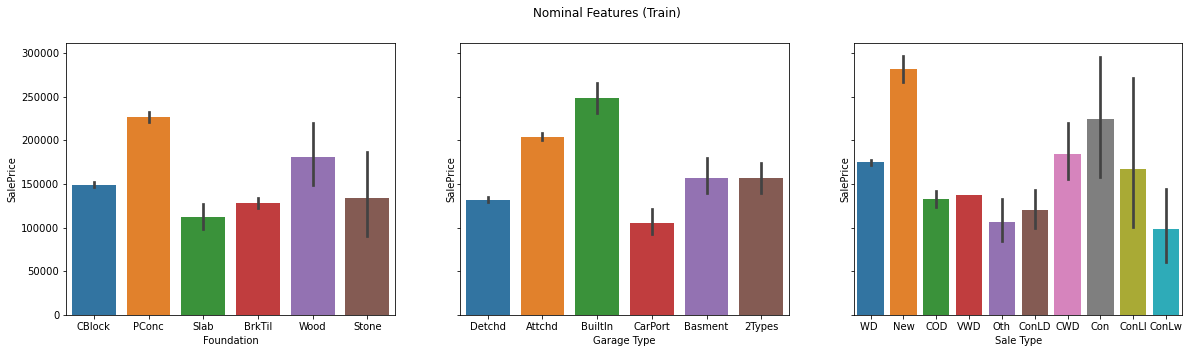

In [29]:
fig,ax=plt.subplots(1,3,figsize=(20,5),sharey=True)
fig.suptitle('Nominal Features (Train)')

sns.barplot(ax=ax[0],x=nominal_train['Foundation'],y=y_train['SalePrice'])
sns.barplot(ax=ax[1],x=nominal_train['Garage Type'],y=y_train['SalePrice'])
sns.barplot(ax=ax[2],x=nominal_train['Sale Type'],y=y_train['SalePrice'])

<AxesSubplot:xlabel='Sale Type', ylabel='SalePrice'>

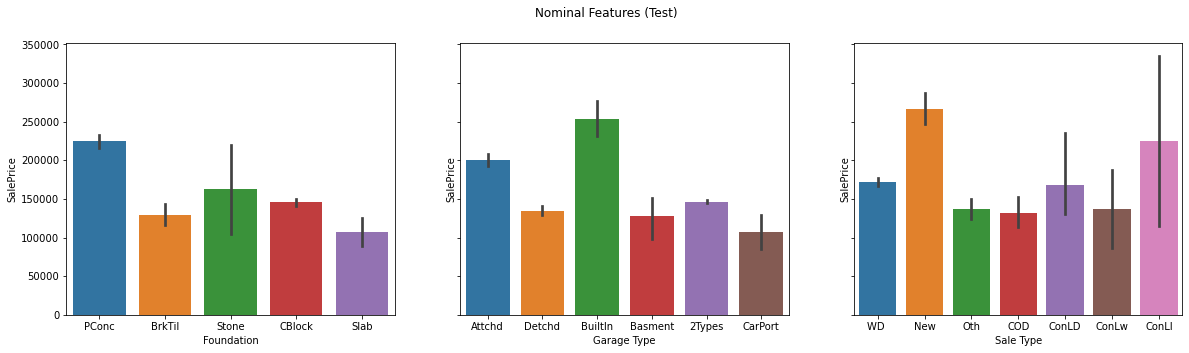

In [30]:
fig,ax=plt.subplots(1,3,figsize=(20,5),sharey=True)
fig.suptitle('Nominal Features (Test)')

sns.barplot(ax=ax[0],x=nominal_test['Foundation'],y=y_test['SalePrice'])
sns.barplot(ax=ax[1],x=nominal_test['Garage Type'],y=y_test['SalePrice'])
sns.barplot(ax=ax[2],x=nominal_test['Sale Type'],y=y_test['SalePrice'])

---
# 4. Use ColumnTransformer and pipeline to encode nominal, ordinal, discrete variables. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters.

**Nominal Variables**

Linear Regression without Scaler

In [31]:
nom_cols=nominal_train.columns.tolist()
model=LinearRegression()
transformer=ColumnTransformer(transformers=[('nom',OneHotEncoder(sparse=False,handle_unknown='ignore'),nom_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
nom_lin_tr=np.mean(cross_val_score(pipeline,nominal_train,y_train))
nom_lin_te=np.mean(cross_val_score(pipeline,nominal_test,y_test))
print('Train: ',nom_lin_tr,'Test: ',nom_lin_te)

Train:  0.7145592895151854 Test:  0.6403239386332401


Linear Regression with Scaler

In [32]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
nom_lin_tr_scaler=np.mean(cross_val_score(pipeline,nominal_train,y_train))
nom_lin_te_scaler=np.mean(cross_val_score(pipeline,nominal_test,y_test))
print('Train: ',nom_lin_tr_scaler,'Test: ',nom_lin_te)

Train:  0.6663679480561576 Test:  0.6403239386332401


Ridge without Scaler

In [33]:
model=Ridge()
transformer=ColumnTransformer(transformers=[('nom',OneHotEncoder(sparse=False,handle_unknown='ignore'),nom_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
nom_ridge_tr=np.mean(cross_val_score(pipeline,nominal_train,y_train))
nom_ridge_te=np.mean(cross_val_score(pipeline,nominal_test,y_test))
print('Train: ',nom_ridge_tr,'Test: ',nom_ridge_te)

Train:  0.7164601998038773 Test:  0.6519581099387921


Ridge with Scaler

In [34]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
nom_ridge_tr_scaler=np.mean(cross_val_score(pipeline,nominal_train,y_train))
nom_ridge_te_scaler=np.mean(cross_val_score(pipeline,nominal_test,y_test))
print('Train: ',nom_ridge_tr_scaler,'Test: ',nom_ridge_te)

Train:  0.6678458429830524 Test:  0.6519581099387921


Lasso without Scaler

In [35]:
model=Lasso()
transformer=ColumnTransformer(transformers=[('nom',OneHotEncoder(sparse=False,handle_unknown='ignore'),nom_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
nom_las_tr=np.mean(cross_val_score(pipeline,nominal_train,y_train))
nom_las_te=np.mean(cross_val_score(pipeline,nominal_test,y_test))
print('Train: ',nom_las_tr,'Test: ',nom_las_te)

Train:  0.6965003198127352 Test:  0.643446960939696


Lasso with Scaler

In [36]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
nom_las_tr_scaler=np.mean(cross_val_score(pipeline,nominal_train,y_train))
nom_las_te_scaler=np.mean(cross_val_score(pipeline,nominal_test,y_test))
print('Train: ',nom_las_tr_scaler,'Test: ',nom_las_te)

Train:  0.3882994478274808 Test:  0.643446960939696


Elastic Net without Scaler

In [37]:
model=ElasticNet()
transformer=ColumnTransformer(transformers=[('nom',OneHotEncoder(sparse=False,handle_unknown='ignore'),nom_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
nom_en_tr=np.mean(cross_val_score(pipeline,nominal_train,y_train))
nom_en_te=np.mean(cross_val_score(pipeline,nominal_test,y_test))
print('Train: ',nom_en_tr,'Test: ',nom_en_te)

Train:  0.4654592894967675 Test:  0.4584844584189803


Elastic Net with Scaler

In [38]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
nom_en_tr_scaler=np.mean(cross_val_score(pipeline,nominal_train,y_train))
nom_en_te_scaler=np.mean(cross_val_score(pipeline,nominal_test,y_test))
print('Train: ',nom_en_tr_scaler,'Test: ',nom_en_te)

Train:  0.6394321194180004 Test:  0.4584844584189803


Looking at the results given by cross_val_score(), the standard scaler did not seem to improve the accuracy of the model. The score from the training set lowered when the scaler was added and the score from the training data remained the same. The only time the scaler was able to have improve the accuracy of the model was with Elastic Net, we see above that without the scaler, the score was approximately 0.46 and when the scaler was included, it went up to approximately 0.64.

**Ordinal Variables**

Linear Regression without Scaler

In [40]:
ord_cols=ordinal_train.columns.tolist()
model=LinearRegression()
transformer=ColumnTransformer(transformers=[('ord',OneHotEncoder(sparse=False,handle_unknown='ignore'),ord_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
train_score=np.mean(cross_val_score(pipeline,ordinal_train,y_train))
test_score=np.mean(cross_val_score(pipeline,ordinal_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  -2.223692078389098e+22 Test:  -3.4066765375445595e+24


Linear Regression with Scaler

In [41]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
train_score=np.mean(cross_val_score(pipeline,ordinal_train,y_train))
test_score=np.mean(cross_val_score(pipeline,ordinal_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  -4.803493611992432e+24 Test:  -7.849673288973336e+25


Ridge without Scaler

In [42]:
ord_cols=ordinal_train.columns.tolist()
model=Ridge()
transformer=ColumnTransformer(transformers=[('ord',OneHotEncoder(sparse=False,handle_unknown='ignore'),ord_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
train_score=np.mean(cross_val_score(pipeline,ordinal_train,y_train))
test_score=np.mean(cross_val_score(pipeline,ordinal_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.7858151071558764 Test:  0.7532379939618414


Ridge with Scaler

In [43]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
train_score=np.mean(cross_val_score(pipeline,ordinal_train,y_train))
test_score=np.mean(cross_val_score(pipeline,ordinal_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.7827042966729325 Test:  0.7448349564956926


Lasso without Scaler

In [45]:
ord_cols=ordinal_train.columns.tolist()
model=Lasso()
transformer=ColumnTransformer(transformers=[('ord',OneHotEncoder(sparse=False,handle_unknown='ignore'),ord_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
train_score=np.mean(cross_val_score(pipeline,ordinal_train,y_train))
test_score=np.mean(cross_val_score(pipeline,ordinal_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.7837282356947846 Test:  0.7435120168560833


Lasso with Scaler

In [46]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
train_score=np.mean(cross_val_score(pipeline,ordinal_train,y_train))
test_score=np.mean(cross_val_score(pipeline,ordinal_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.782338002986565 Test:  0.7435122118192311


Elastic Net without Scaler

In [47]:
ord_cols=ordinal_train.columns.tolist()
model=ElasticNet()
transformer=ColumnTransformer(transformers=[('ord',OneHotEncoder(sparse=False,handle_unknown='ignore'),ord_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
train_score=np.mean(cross_val_score(pipeline,ordinal_train,y_train))
test_score=np.mean(cross_val_score(pipeline,ordinal_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.6094836106775443 Test:  0.6175526646899889


Elastic Net with Scaler

In [48]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
train_score=np.mean(cross_val_score(pipeline,ordinal_train,y_train))
test_score=np.mean(cross_val_score(pipeline,ordinal_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.7728126527903976 Test:  0.7499468320564476


For the training set, we see the same trend with the nominal variables, the scores when the scaler was included did not go up with the models except for Elastic Net.
For the testing set, the scores went up with the help of Standard Scaler but only with the models Lasso and Elastic Net.

**Discrete Variables**

Linear Regression without Scaler

In [49]:
disc_cols=discrete_train.columns.tolist()
model=LinearRegression()
transformer=ColumnTransformer(transformers=[('disc',OneHotEncoder(sparse=False,handle_unknown='ignore'),disc_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
train_score=np.mean(cross_val_score(pipeline,discrete_train,y_train))
test_score=np.mean(cross_val_score(pipeline,discrete_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.7393525526235891 Test:  0.7207881469128068


Linear Regression with Scaler

In [50]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
train_score=np.mean(cross_val_score(pipeline,discrete_train,y_train))
test_score=np.mean(cross_val_score(pipeline,discrete_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.7111534296704395 Test:  0.7099608215590184


Ridge without Scaler

In [51]:
disc_cols=discrete_train.columns.tolist()
model=Ridge()
transformer=ColumnTransformer(transformers=[('disc',OneHotEncoder(sparse=False,handle_unknown='ignore'),disc_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
train_score=np.mean(cross_val_score(pipeline,discrete_train,y_train))
test_score=np.mean(cross_val_score(pipeline,discrete_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.7433974044702165 Test:  0.7335457086692345


Ridge with Scaler

In [52]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
train_score=np.mean(cross_val_score(pipeline,discrete_train,y_train))
test_score=np.mean(cross_val_score(pipeline,discrete_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.7112417291855835 Test:  0.7101326184394765


Lasso without Scaler

In [53]:
disc_cols=discrete_train.columns.tolist()
model=Lasso()
transformer=ColumnTransformer(transformers=[('disc',OneHotEncoder(sparse=False,handle_unknown='ignore'),disc_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
train_score=np.mean(cross_val_score(pipeline,discrete_train,y_train))
test_score=np.mean(cross_val_score(pipeline,discrete_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.737153013664026 Test:  0.7205941811761936


Lasso with Scaler

In [54]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
train_score=np.mean(cross_val_score(pipeline,discrete_train,y_train))
test_score=np.mean(cross_val_score(pipeline,discrete_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.42986337481597986 Test:  0.28876140132998096


Elastic Net without Scaler

In [55]:
disc_cols=discrete_train.columns.tolist()
model=ElasticNet()
transformer=ColumnTransformer(transformers=[('disc',OneHotEncoder(sparse=False,handle_unknown='ignore'),disc_cols)],remainder='passthrough')
pipeline=Pipeline((('t',transformer),('m',model)))
train_score=np.mean(cross_val_score(pipeline,discrete_train,y_train))
test_score=np.mean(cross_val_score(pipeline,discrete_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.5102143129890802 Test:  0.5247900284853242


Elastic Net with Scaler

In [56]:
scaler=StandardScaler()
pipeline=Pipeline((('t',transformer),('s',scaler),('m',model)))
train_score=np.mean(cross_val_score(pipeline,discrete_train,y_train))
test_score=np.mean(cross_val_score(pipeline,discrete_test,y_test))
print('Train: ',train_score,'Test: ',test_score)

Train:  0.6848196958629537 Test:  0.685830383650919


The same trend with the nominal and ordinal variables training set, the scores when the scaler was included did not go up with the models except for Elastic Net. The scaler did not help when applied to the testing sets.

# 5. Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

**Nominal Variables**

Ridge w/o scaler

In [57]:
pipeline=Pipeline((('t',ColumnTransformer(transformers=[('nom',OneHotEncoder(sparse=False,handle_unknown='ignore'),nom_cols)],remainder='passthrough')),('m',Ridge())))
grid = {'m__alpha':[0.001, 0.001,0.01, 0.1]}
gridS=GridSearchCV(estimator=pipeline,param_grid=grid,cv=5)
gridS.fit(nominal_train,y_train)
print(gridS.best_params_)
print(gridS.best_score_)

{'m__alpha': 0.1}
0.7150702651585134


<AxesSubplot:xlabel='param_m__alpha', ylabel='mean_test_score'>

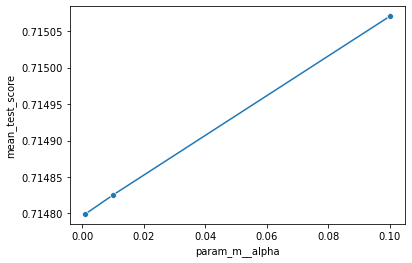

In [58]:
res=pd.DataFrame(gridS.cv_results_)
sns.lineplot(data=res,y='mean_test_score',x='param_m__alpha',marker='o')

Lasso w/o Scaler

In [59]:
pipeline=Pipeline((('t',ColumnTransformer(transformers=[('nom',OneHotEncoder(sparse=False,handle_unknown='ignore'),nom_cols)],remainder='passthrough')),('m',Lasso())))
grid = {'m__alpha':[0.001, 0.001,0.01, 0.1]}
gridS=GridSearchCV(estimator=pipeline,param_grid=grid,cv=5)
gridS.fit(nominal_train,y_train)
print(gridS.best_params_)
print(gridS.best_score_)

{'m__alpha': 0.1}
0.6828101193414002


<AxesSubplot:xlabel='param_m__alpha', ylabel='mean_test_score'>

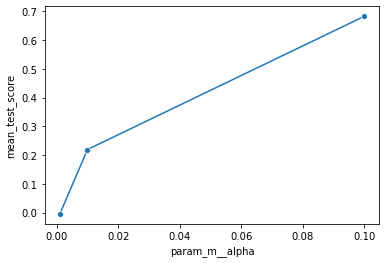

In [60]:
res=pd.DataFrame(gridS.cv_results_)
sns.lineplot(data=res,y='mean_test_score',x='param_m__alpha',marker='o')

Elastic w/ Scaler

In [61]:
pipeline=Pipeline((('t',ColumnTransformer(transformers=[('ord',OneHotEncoder(sparse=False,handle_unknown='ignore'),nom_cols)],remainder='passthrough')),('s',StandardScaler()),('m',ElasticNet())))
grid = {'m__alpha':[0.001, 0.001,0.01, 0.1]}
gridS=GridSearchCV(estimator=pipeline,param_grid=grid,cv=5)
gridS.fit(nominal_train,y_train)
print(gridS.best_params_)
print(gridS.best_score_)

{'m__alpha': 0.01}
0.6678122763649502


<AxesSubplot:xlabel='param_m__alpha', ylabel='mean_test_score'>

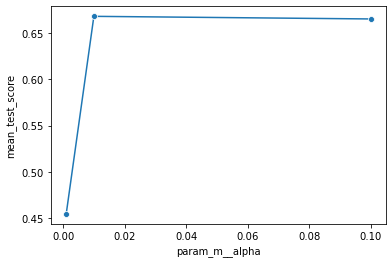

In [62]:
res=pd.DataFrame(gridS.cv_results_)
sns.lineplot(data=res,y='mean_test_score',x='param_m__alpha',marker='o')

**Ordinal Variables**

Ridge w/o scaler

In [63]:
pipeline=Pipeline((('t',ColumnTransformer(transformers=[('ord',OneHotEncoder(sparse=False,handle_unknown='ignore'),ord_cols)],remainder='passthrough')),('m',Ridge())))
grid = {'m__alpha':[0.001, 0.001,0.01, 0.1]}
gridS=GridSearchCV(estimator=pipeline,param_grid=grid,cv=5)
gridS.fit(ordinal_train,y_train)
print(gridS.best_params_)
print(gridS.best_score_)

{'m__alpha': 0.1}
0.7845063418429981


<AxesSubplot:xlabel='param_m__alpha', ylabel='mean_test_score'>

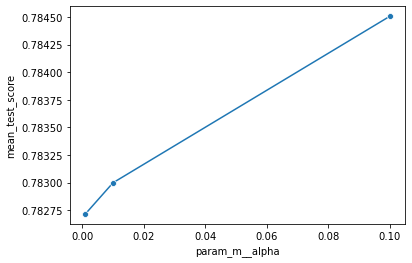

In [64]:
res=pd.DataFrame(gridS.cv_results_)
sns.lineplot(data=res,y='mean_test_score',x='param_m__alpha',marker='o')

Lasso w/o Scaler

In [65]:
pipeline=Pipeline((('t',ColumnTransformer(transformers=[('ord',OneHotEncoder(sparse=False,handle_unknown='ignore'),ord_cols)],remainder='passthrough')),('m',Lasso())))
grid = {'m__alpha':[0.001, 0.001,0.01, 0.1]}
gridS=GridSearchCV(estimator=pipeline,param_grid=grid,cv=5)
gridS.fit(ordinal_train,y_train)
print(gridS.best_params_)
print(gridS.best_score_)

{'m__alpha': 0.1}
0.7825934977051305


<AxesSubplot:xlabel='param_m__alpha', ylabel='mean_test_score'>

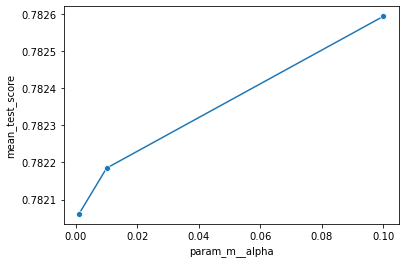

In [66]:
res=pd.DataFrame(gridS.cv_results_)
sns.lineplot(data=res,y='mean_test_score',x='param_m__alpha',marker='o')

Elastic w/ Scaler

In [67]:
pipeline=Pipeline((('t',ColumnTransformer(transformers=[('ord',OneHotEncoder(sparse=False,handle_unknown='ignore'),ord_cols)],remainder='passthrough')),('s',StandardScaler()),('m',ElasticNet())))
grid = {'m__alpha':[0.001, 0.001,0.01, 0.1]}
gridS=GridSearchCV(estimator=pipeline,param_grid=grid,cv=5)
gridS.fit(ordinal_train,y_train)
print(gridS.best_params_)
print(gridS.best_score_)

{'m__alpha': 0.1}
0.7850313298448912


<AxesSubplot:xlabel='param_m__alpha', ylabel='mean_test_score'>

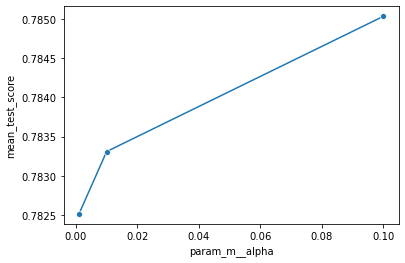

In [68]:
res=pd.DataFrame(gridS.cv_results_)
sns.lineplot(data=res,y='mean_test_score',x='param_m__alpha',marker='o')

**Discrete Variables**

Ridge w/o scaler

In [69]:
pipeline=Pipeline((('t',ColumnTransformer(transformers=[('disc',OneHotEncoder(sparse=False,handle_unknown='ignore'),disc_cols)],remainder='passthrough')),('m',Ridge())))
grid = {'m__alpha':[0.001, 0.001,0.01, 0.1]}
gridS=GridSearchCV(estimator=pipeline,param_grid=grid,cv=5)
gridS.fit(discrete_train,y_train)
print(gridS.best_params_)
print(gridS.best_score_)

{'m__alpha': 0.1}
0.7400846851979346


<AxesSubplot:xlabel='param_m__alpha', ylabel='mean_test_score'>

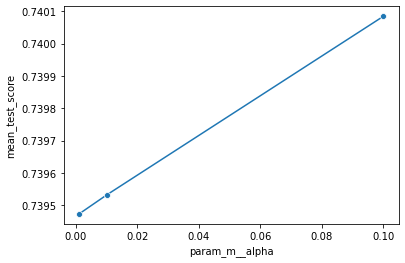

In [70]:
res=pd.DataFrame(gridS.cv_results_)
sns.lineplot(data=res,y='mean_test_score',x='param_m__alpha',marker='o')

Lasso w/o Scaler

In [71]:
pipeline=Pipeline((('t',ColumnTransformer(transformers=[('disc',OneHotEncoder(sparse=False,handle_unknown='ignore'),disc_cols)],remainder='passthrough')),('m',Lasso())))
grid = {'m__alpha':[0.001, 0.001,0.01, 0.1]}
gridS=GridSearchCV(estimator=pipeline,param_grid=grid,cv=5)
gridS.fit(discrete_train,y_train)
print(gridS.best_params_)
print(gridS.best_score_)

{'m__alpha': 0.1}
0.7193386273169388


<AxesSubplot:xlabel='param_m__alpha', ylabel='mean_test_score'>

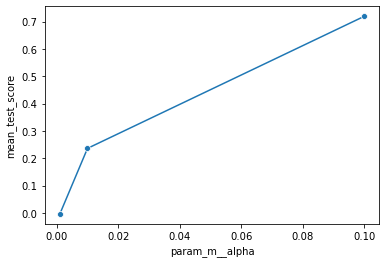

In [72]:
res=pd.DataFrame(gridS.cv_results_)
sns.lineplot(data=res,y='mean_test_score',x='param_m__alpha',marker='o')

Elastic w/ Scaler

In [73]:
pipeline=Pipeline((('t',ColumnTransformer(transformers=[('disc',OneHotEncoder(sparse=False,handle_unknown='ignore'),disc_cols)],remainder='passthrough')),('s',StandardScaler()),('m',ElasticNet())))
grid = {'m__alpha':[0.001, 0.001,0.01, 0.1]}
gridS=GridSearchCV(estimator=pipeline,param_grid=grid,cv=5)
gridS.fit(discrete_train,y_train)
print(gridS.best_params_)
print(gridS.best_score_)

{'m__alpha': 0.01}
0.7114537649798816


<AxesSubplot:xlabel='param_m__alpha', ylabel='mean_test_score'>

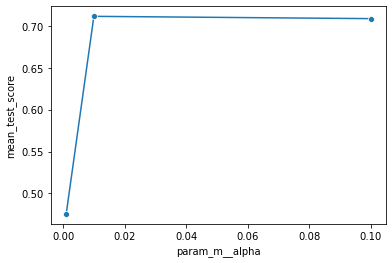

In [74]:
res=pd.DataFrame(gridS.cv_results_)
sns.lineplot(data=res,y='mean_test_score',x='param_m__alpha',marker='o')

From the results above, we see that the models have improved after tuning the parameters via GridSearch Cv.

References:

https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
https://medium.com/@soohyunniekimm/logistic-regression-with-columntransformer-pipeline-and-gridsearchcv-d2e3a781422f
https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/
https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b
https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression/notebook
https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8